In [1]:
import pandas as pd
import numpy as np

In [2]:
movies=pd.read_csv('movieoutput.csv', na_values='?',encoding='latin-1')
rating=pd.read_csv('ratings1.csv')
rating.drop(['Timestamp'],axis=1,inplace=True)

In [3]:
movies.head()

,MovieID,Title,Genres;
0,1,Toy Story (1995),Animation|Children's|Comedy;
1,2,Jumanji (1995),Adventure|Children's|Fantasy;
2,3,Grumpier Old Men (1995),Comedy|Romance;
3,4,Waiting to Exhale (1995),Comedy|Drama;
4,5,Father of the Bride Part II (1995),Comedy;


In [4]:
#Since we dont need any ; character in Genres column I prefer delete them
movies.replace(';','',regex=True, inplace=True)

In [5]:
movies.drop(['Genres;'],axis=1,inplace=True)
movies.head()

,MovieID,Title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [6]:
rating.head()

,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [7]:
result1 = movies.merge( rating, on = 'MovieID')
result1.head()

,MovieID,Title,UserID,Rating
0,1,Toy Story (1995),1,5
1,1,Toy Story (1995),6,4
2,1,Toy Story (1995),8,4
3,1,Toy Story (1995),9,5
4,1,Toy Story (1995),10,5


In [8]:
result1.drop(['MovieID'],axis=1,inplace=True)
result1.head()

,Title,UserID,Rating
0,Toy Story (1995),1,5
1,Toy Story (1995),6,4
2,Toy Story (1995),8,4
3,Toy Story (1995),9,5
4,Toy Story (1995),10,5


In [9]:
M = result1.pivot_table(index=['UserID'],columns=['Title'],values='Rating')

M is the table for users\movies cells has the rating scores.
So we can find average rating for each film.

In [10]:
M.head()

Title,$1000000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
def pearson(movie1,movie2):
    movie1_cor= movie1-movie1.mean()
    #print(M.mean())
    movie2_cor= movie2-movie2.mean()
    return np.sum(movie1_cor*movie2_cor)/np.sqrt(np.sum(movie1_cor**2)*np.sum(movie2_cor**2))

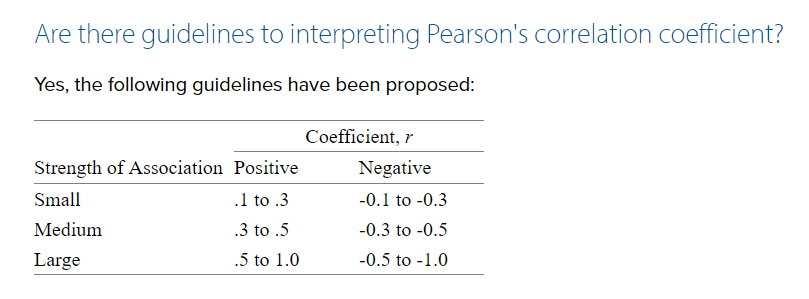

This is how we read the result

In [42]:
pearson(M['12 Angry Men (1957)'],M['Young Sherlock Holmes (1985)'])

0.058572081602890472

In [30]:
import numpy as np
def recomendation(movies,M,num):
    reviews = []
    for movie in movies:
        for title in M.columns:
            if title == movie:
                continue
            correlation = pearson(M[movie],M[title])
            if not np.isnan(correlation):
                reviews.append([correlation,title])
    
    reviews.sort(reverse=True)
    return reviews[:num]

In [31]:
recomended_films=recomendation(['Star Trek: The Motion Picture (1979)','Toy Story (1995)','Jumanji (1995)','Casper (1995)'],M,10)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [32]:
recomended_films[:10]

[[0.41871679889444857, 'Star Trek V: The Final Frontier (1989)'],
 [0.35929894435512466, 'Toy Story 2 (1999)'],
 [0.33670800563979664, 'Star Trek III: The Search for Spock (1984)'],
 [0.29848392810478863, 'Star Trek: Generations (1994)'],
 [0.26312988004588117, 'Aladdin (1992)'],
 [0.25092535890794154, 'Star Trek: Insurrection (1998)'],
 [0.24181875790214916, "Bug's Life A (1998)"],
 [0.23865596193789471, 'Hook (1991)'],
 [0.21952860931705931, 'Star Trek VI: The Undiscovered Country (1991)'],
 [0.21692535743098465, 'Beauty and the Beast (1991)']]

When we compare the recomended movies and given movies, we can easily see that there is a corelation.